In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

# reading data
path_to_csv = "/tmp/tbots/yellow_test/path_summary.csv"
def read_csv(path):
    return pd.read_csv(path)

df = read_csv(path_to_csv)
print(df.columns)
df

Index(['sub_dest_x', 'sub_dest_y', 'connection_time', 'duration', 'start_x',
       'start_y', 'end_x', 'end_y', 'initial_vel(x)', 'initial_vel(y)', 'x1',
       'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7',
       'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11', 'y11', 'x12', 'y12',
       'x13', 'y13', 'x14', 'y14', 'x15', 'y15', 'x16', 'y16', 'x17', 'y17',
       'x18', 'y18', 'x19', 'y19', 'x20', 'y20'],
      dtype='object')


,sub_dest_x,sub_dest_y,connection_time,duration,start_x,start_y,end_x,end_y,initial_vel(x),initial_vel(y),...,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20
0,0.235477,0.835009,0.2,2.45971,0.135477,0.835009,0.968868,0.221034,0.308167,0.547221,...,0.888031,0.388524,0.917132,0.327683,0.939766,0.280515,0.955934,0.247021,0.965634,0.227199
1,0.235477,0.835009,0.4,2.51535,0.135477,0.835009,0.968868,0.221034,0.308167,0.547221,...,0.868364,0.389362,0.905055,0.328764,0.933448,0.281632,0.953544,0.247967,0.965342,0.227767
2,0.235477,0.835009,0.6,2.59146,0.135477,0.835009,0.968868,0.221034,0.308167,0.547221,...,0.835731,0.381453,0.883660,0.323413,0.920939,0.278353,0.947566,0.246270,0.963542,0.227165
3,0.235477,0.835009,0.8,2.70064,0.135477,0.835009,0.968868,0.221034,0.308167,0.547221,...,0.795869,0.367776,0.858372,0.314949,0.906923,0.273861,0.941522,0.244513,0.962169,0.226904
4,0.235477,0.835009,1.0,2.86595,0.135477,0.835009,0.968868,0.221034,0.308167,0.547221,...,0.744001,0.341868,0.824953,0.297902,0.887916,0.263838,0.932889,0.239674,0.959873,0.225412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79232,3.192880,-0.760183,2.6,6.73644,0.452245,0.460027,0.673637,0.176953,0.187831,0.096487,...,1.939470,-0.373260,1.504660,-0.184466,1.140800,-0.026345,0.881017,0.086598,0.725294,0.154364
79233,3.192880,-0.760183,2.8,6.73800,0.452245,0.460027,0.673637,0.176953,0.187831,0.096487,...,1.944710,-0.359835,1.507830,-0.175670,1.142390,-0.021397,0.881549,0.088797,0.725297,0.154914
79234,3.192880,-0.760183,3.0,6.74027,0.452245,0.460027,0.673637,0.176953,0.187831,0.096487,...,1.950000,-0.344465,1.510810,-0.165605,1.143720,-0.015736,0.881830,0.091314,0.725138,0.155543
79235,3.192880,-0.760183,3.2,6.73899,0.452245,0.460027,0.673637,0.176953,0.187831,0.096487,...,1.960510,-0.326389,1.519040,-0.153078,1.149170,-0.008306,0.884987,0.094956,0.726475,0.156708


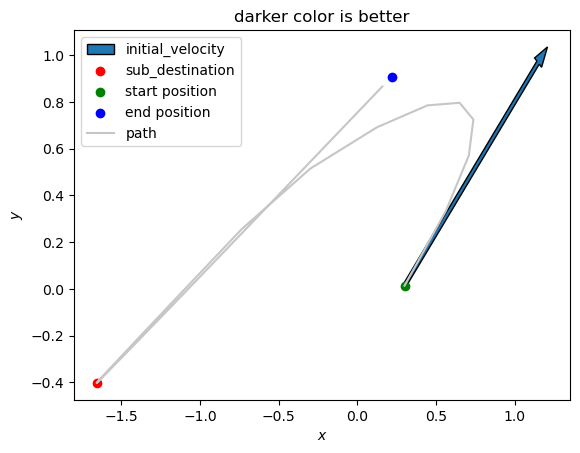

In [2]:
data_points_num = 20
max_duration = df["duration"].max() 
min_duration = df["duration"].min()

def extract_row(row):
    x = []
    y = []
    duration = row["duration"]
    for i in range(1, data_points_num + 1, 1):
        x.append(row[f"x{i}"])
        y.append(row[f"y{i}"])
    return np.array(x), np.array(y), duration


def plot_row(row):
    vel_x = row["initial_vel(x)"]
    vel_y = row["initial_vel(y)"]
    sub_dest_x = row["sub_dest_x"]
    sub_dest_y = row["sub_dest_y"]
    start_x = row["start_x"]
    start_y = row["start_y"]
    end_x = row["end_x"]
    end_y = row["end_y"]
    connection_time = row["connection_time"]
    
    x, y, duration = extract_row(row)
    standardized_color = (duration - min_duration ) / (max_duration - min_duration)
    color = (standardized_color,standardized_color, standardized_color)
    
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.arrow(start_x, start_y, vel_x, vel_y, label="initial_velocity", width=0.02)
    plt.scatter([sub_dest_x], [sub_dest_y], c="r", label="sub_destination")
    plt.scatter([start_x], [start_y], c="g", label="start position")
    plt.scatter([end_x], [end_y], c="b", label="end position")

    plt.title("darker color is better")
    plt.plot(x, y, c=color, label="path")
    
    plt.legend()
    plt.show()

row = df.loc[10000]
plot_row(row)

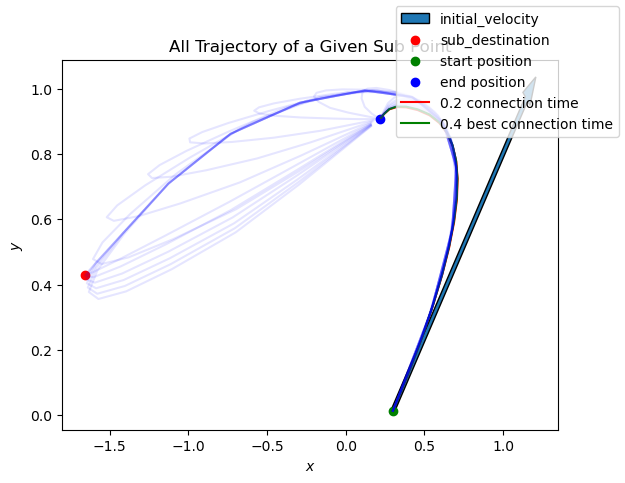

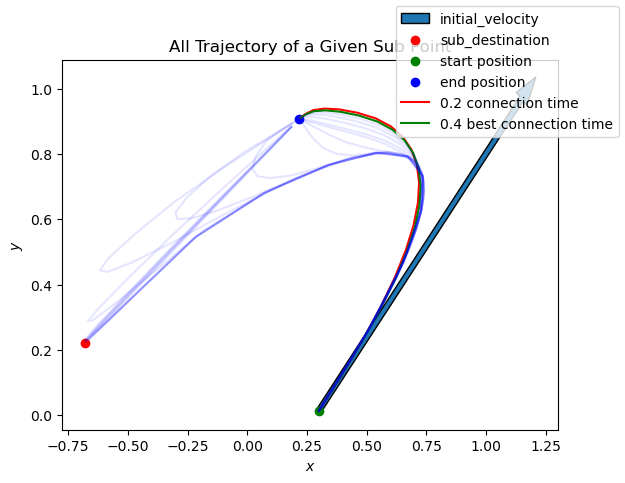

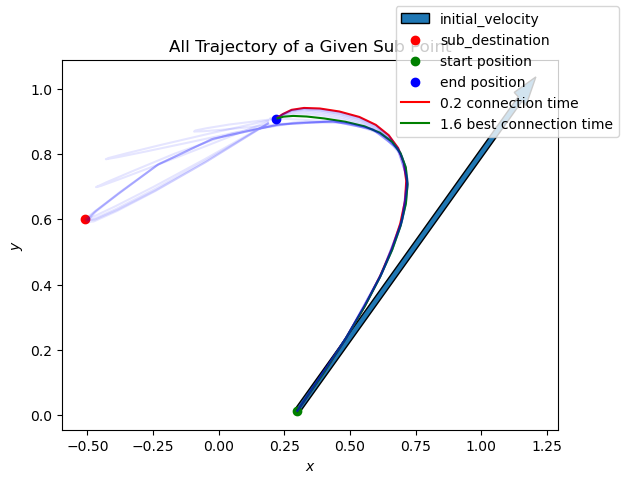

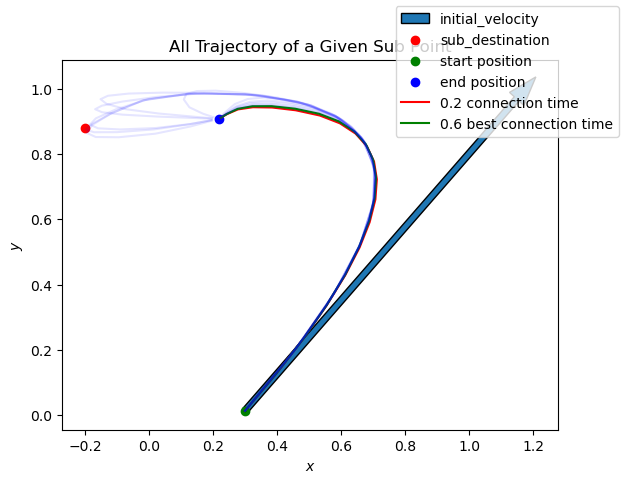

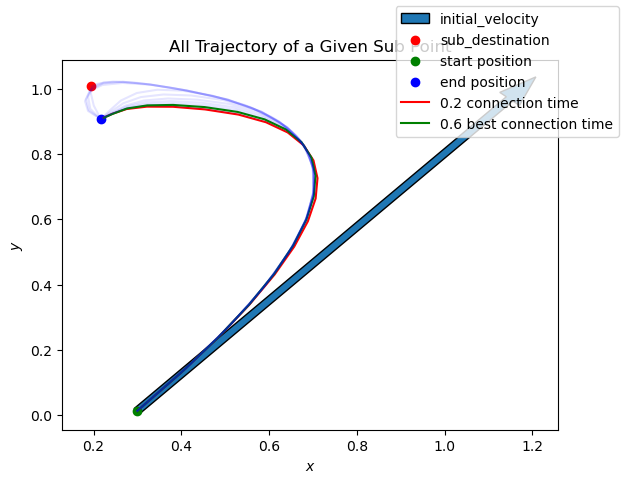

In [3]:
"""
The following code plots all the trajectory that goes through a sub destination where 0.2 connection does not yield the best time. 
"""

# plot all the path for a given trajectory
start_x = df.iloc[10000]["start_x"]
start_y = df.iloc[10000]["start_y"]
end_x = df.iloc[10000]["end_x"]
end_y = df.iloc[10000]["end_y"]

# probably a smarter way to do this, I can't be bothered
start_x, start_y, end_x, end_y
trajectory_collection = df.loc[df["start_x"] == start_x]
trajectory_collection = df.loc[df["start_y"] == start_y]
trajectory_collection = df.loc[df["end_x"] == end_x]
trajectory_collection = df.loc[df["end_y"] == end_y]

minimum_index = trajectory_collection.groupby(["sub_dest_x", "sub_dest_y"])["duration"].idxmin()
fastest_trajectory_per_sub_destination = trajectory_collection.loc[minimum_index]
non_point_two_fastest_trajectory = fastest_trajectory_per_sub_destination[fastest_trajectory_per_sub_destination["connection_time"] != 0.2]

def plot_all_path_to_sub_dest(sub_dest_x, sub_dest_y, sub_df):
    paths = sub_df.loc[sub_df["sub_dest_x"] == sub_dest_x]
    paths = paths.loc[paths["sub_dest_y"] == sub_dest_y]
    paths = paths.sort_values("connection_time")

    fig, ax = plt.subplots() 
    # basic information
    vel_x = row["initial_vel(x)"]
    vel_y = row["initial_vel(y)"]
    sub_dest_x = row["sub_dest_x"]
    sub_dest_y = row["sub_dest_y"]
    start_x = row["start_x"]
    start_y = row["start_y"]
    end_x = row["end_x"]
    end_y = row["end_y"]

    # plotting basic stuff
    plt.title("All Trajectory of a Given Sub Point")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.arrow(start_x, start_y, vel_x, vel_y, label="initial_velocity", width=0.02)
    plt.scatter([sub_dest_x], [sub_dest_y], c="r", label="sub_destination")
    plt.scatter([start_x], [start_y], c="g", label="start position")
    plt.scatter([end_x], [end_y], c="b", label="end position")

    # best connection_time
    best_connection_time = paths.loc[paths["duration"].idxmin()]["connection_time"]
    
    for path in paths.iloc:
        x, y, duration = extract_row(path)
        connection_time = path["connection_time"]

        if connection_time == 0.2:
            ax.plot(x, y, label="0.2 connection time", c="r", alpha=1.0)
        elif connection_time == best_connection_time: 
            ax.plot(x, y, label=f"{best_connection_time} best connection time", c="g", alpha=1)
        else:
            ax.plot(x, y, c="b", alpha=0.1)
            
    fig.legend()
            
# plotting all the trajectory where 0.2 connection time is not the fastest 
for row in non_point_two_fastest_trajectory.iloc():
    sub_dest_x = row["sub_dest_x"]
    sub_dest_y = row["sub_dest_y"]
    plot_all_path_to_sub_dest(sub_dest_x, sub_dest_y, trajectory_collection)

In [4]:
# calculating the probability of getting a path's whoes best path is not at connection time of 0.2

fastest_path_index = df.groupby(["start_x", "start_y", 'end_x', 'end_y', "sub_dest_x", "sub_dest_y"])["duration"].idxmin()
fastest_path_rows = df.loc[fastest_path_index]
not_point_two_count = (fastest_path_rows["connection_time"] != 0.2).sum()
total_number = len(fastest_path_rows)
p = not_point_two_count/total_number

print(f"Therefore, the probaility of finding a path whoe's connection time is not of 0.2 is p = {p:.4f}")

Therefore, the probaility of finding a path whoe's connection time is not of 0.2 is p = 0.0694


In [5]:
# calculating the average duration difference between fastest and 0.2 second connection time
# probabily a better way to do this

not_point_two_rows = fastest_path_rows.loc[fastest_path_rows["connection_time"] != 0.2]
not_point_two_rows = not_point_two_rows.sort_values(["sub_dest_x", 'sub_dest_y', 'start_x', 'start_y', 'end_x', 'end_y'])

point_two_rows = df.loc[df["connection_time"] == 0.2]
point_two_rows = point_two_rows[point_two_rows["sub_dest_x"].isin(not_point_two_rows["sub_dest_x"])]
point_two_rows = point_two_rows[point_two_rows["sub_dest_y"].isin(not_point_two_rows["sub_dest_y"])]
point_two_rows = point_two_rows.sort_values(["sub_dest_x", 'sub_dest_y', 'start_x', 'start_y', 'end_x', 'end_y'])

average_diff = np.sum(point_two_rows["duration"] - not_point_two_rows["duration"].to_numpy()) / len(not_point_two_rows["duration"].to_numpy())


f"the average difference is {average_diff:5f} s between the best and 0.2 second connection time path"

'the average difference is 0.005186 s between the best and 0.2 second connection time path'

# Conclusion: Hypothesis One

Based on the calculation above, about **7** percent of the time, hypothesis one is not true.


When the hypothesis is not true, the average difference between the two path is around **0.005186** seconds. 

## Theory on why 0.2 connection time may not always be the best

Sometimes, you may be able to curve down a bit more at a greater connection time. As such, the total duration would decrease as shown in the plots above.

## How is this tested 

I've randomly generated 100 trajectories in the Trajectory planner to test this.

**Side note: I think this is a bit incomplete because position is bounded between (0, 1) for both x and y.**